In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from parse import parse

from alphaMusic.utils.fls_utils import load_from_pkl
import alphaMusic.evaluation as evl

In [7]:
path_to_results = Path('..','recipes','EUSIPCO22','results')
assert path_to_results.exists()

files = path_to_results.glob('N:30*DRR:2.5*.pkl')
exp_name = 'N:{n_samples}_RT60:{rt60_name}_SNR:{snr_name}_DRR:{drr_name}_nsrcs:{n_srcs}_nmics:{n_mics}_noise:{noise_type}'

results = pd.DataFrame()
for file in files:
    print(file)
    params = parse(exp_name,str(file.name))
    df = load_from_pkl(file)
    df['n_mics'] = int(params['n_mics'])
    df['n_srcs'] = int(params['n_srcs'])
    results = pd.concat([results, df], ignore_index=True)

../recipes/EUSIPCO22/results/N:30_RT60:1.0_SNR:10_DRR:2.5_nsrcs:3_nmics:2_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:1.0_SNR:10_DRR:2.5_nsrcs:1_nmics:2_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:1.0_SNR:10_DRR:2.5_nsrcs:2_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:1.0_SNR:10_DRR:2.5_nsrcs:4_nmics:2_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:1.0_SNR:10_DRR:2.5_nsrcs:3_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:1.0_SNR:10_DRR:2.5_nsrcs:2_nmics:2_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:1.0_SNR:10_DRR:2.5_nsrcs:2_nmics:6_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:1.0_SNR:10_DRR:2.5_nsrcs:4_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:1.0_SNR:10_DRR:2.5_nsrcs:1_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:30_RT60:1.0_SNR:10_DRR:2.5_nsrcs:1_nmics:6_noise:cafet_results.pkl
../recipes/EUSIPCO22

In [8]:
df = pd.DataFrame()

for r, row in results.iterrows():
    
    # compute metrics
    doas_est = row['DOAs_est']
    doas_ref = row['DOAs']
    
    metrics = evl.compute_ssl_metrics(doas_est, doas_ref)
    
    df.at[r,'algo'] = row['algo']

    df.at[r,'MAE'] = metrics['MAE']
    df.at[r,'RMSE'] = metrics['RMSE']
    df.at[r,'ACC5'] = metrics['ACC5']
    df.at[r,'ACC10'] = metrics['ACC10']
    df.at[r,'MISS'] = metrics['MISS']
    
    # params
    df.at[r,'SNR'] = row['SNR']
    df.at[r,'RT60'] = row['RT60']
    df.at[r,'n_mics'] = row['n_mics']
    df.at[r,'n_srcs'] = row['n_srcs']

In [9]:
df

,algo,MAE,RMSE,ACC5,ACC10,MISS,SNR,RT60,n_mics,n_srcs
0,MUSIC,24.666667,28.577380,0.000000,0.000000,0.0,10.0,1.0,2.0,3.0
1,aMUSIC_est,35.666667,40.236799,0.000000,0.000000,0.0,10.0,1.0,2.0,3.0
2,aMUSIC_fix,33.666667,37.278233,0.000000,0.000000,0.0,10.0,1.0,2.0,3.0
3,NormMUSIC,25.666667,33.511192,0.000000,33.333333,0.0,10.0,1.0,2.0,3.0
4,aNormMUSIC_est,27.000000,33.161222,33.333333,33.333333,0.0,10.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
5035,aMUSIC_fix,11.000000,13.435029,25.000000,75.000000,0.0,10.0,1.0,6.0,4.0
5036,NormMUSIC,7.000000,7.106335,0.000000,100.000000,0.0,10.0,1.0,6.0,4.0
5037,aNormMUSIC_est,6.500000,7.549834,50.000000,75.000000,0.0,10.0,1.0,6.0,4.0
5038,aNormMUSIC_fix,7.250000,7.952987,25.000000,75.000000,0.0,10.0,1.0,6.0,4.0


In [10]:
algo_order = ['MUSIC','aMUSIC_est','aMUSIC_fix','NormMUSIC','aNormMUSIC_est','aNormMUSIC_fix','SRP_PHAT']

In [20]:
table_ij_algo = pd.DataFrame()

metric = 'MAE'

c = 0
for J in [1,2,3,4]:
    for I in [2,4,6]:
        for algo in algo_order:
            df_selection = df.loc[(df['algo'] == algo) 
                                & (df['n_mics'] == I) 
                                & (df['n_srcs'] == J) ]
            err = np.mean(df_selection[metric])
            std = np.std(df_selection[metric])
            
            table_ij_algo.at[c, 'n_srcs'] = int(J)
            table_ij_algo.at[c, 'n_mics'] = int(I)
            table_ij_algo.at[c, algo] = '%1.2f +- %1.2f' % (err, std)
        c += 1

table_ij_algo

,n_srcs,n_mics,MUSIC,aMUSIC_est,aMUSIC_fix,NormMUSIC,aNormMUSIC_est,aNormMUSIC_fix,SRP_PHAT
0,1.0,2.0,58.18 +- 18.19,58.20 +- 20.95,56.90 +- 22.08,50.35 +- 11.99,51.95 +- 13.32,52.92 +- 13.52,51.03 +- 9.84
1,1.0,4.0,56.13 +- 11.51,57.52 +- 13.24,57.18 +- 13.21,54.93 +- 8.41,55.75 +- 8.84,55.72 +- 8.78,59.07 +- 8.15
2,1.0,6.0,53.18 +- 10.74,53.08 +- 11.40,53.78 +- 10.84,53.90 +- 8.89,54.25 +- 8.35,54.23 +- 8.34,62.60 +- 8.22
3,2.0,2.0,30.82 +- 13.93,26.73 +- 12.64,28.62 +- 13.84,27.04 +- 16.14,18.34 +- 11.34,19.68 +- 12.84,34.11 +- 11.57
4,2.0,4.0,33.74 +- 10.41,35.21 +- 11.40,34.17 +- 10.69,24.09 +- 13.15,24.54 +- 11.97,25.00 +- 11.67,34.04 +- 12.56
5,2.0,6.0,27.64 +- 14.72,29.26 +- 10.66,30.02 +- 10.91,23.27 +- 10.42,23.52 +- 9.31,23.50 +- 9.32,27.45 +- 16.63
6,3.0,2.0,19.88 +- 7.22,21.49 +- 10.20,22.08 +- 9.59,18.49 +- 8.31,15.98 +- 7.91,15.85 +- 9.30,21.24 +- 10.37
7,3.0,4.0,20.14 +- 6.21,21.43 +- 8.80,21.78 +- 8.33,16.97 +- 5.88,15.91 +- 6.72,16.38 +- 7.36,21.24 +- 9.07
8,3.0,6.0,19.77 +- 6.55,21.17 +- 7.74,21.18 +- 7.60,13.34 +- 5.73,15.27 +- 6.82,15.10 +- 6.62,18.26 +- 6.56
9,4.0,2.0,15.22 +- 6.10,14.09 +- 5.65,14.45 +- 5.92,14.97 +- 6.94,12.46 +- 4.33,12.38 +- 4.96,16.12 +- 8.96


In [15]:
sns.set(style='whitegrid', context='paper', font_scale=1.2,
        rc={
            'figure.figsize':(3.5,3.15), 
            'lines.linewidth':1.5,
            'font.family': 'sans-serif',
            'font.sans-serif': [u'Helvetica'],
            'text.usetex': False,
            })
pal = sns.cubehelix_palette(7, start=0.5, rot=-0.5,dark=0.3, light=.75, reverse=True, hue=1.)
algo_order = ['MUSIC','aMUSIC_est','aMUSIC_fix','NormMUSIC','aNormMUSIC_est','aNormMUSIC_fix','SRP_PHAT']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


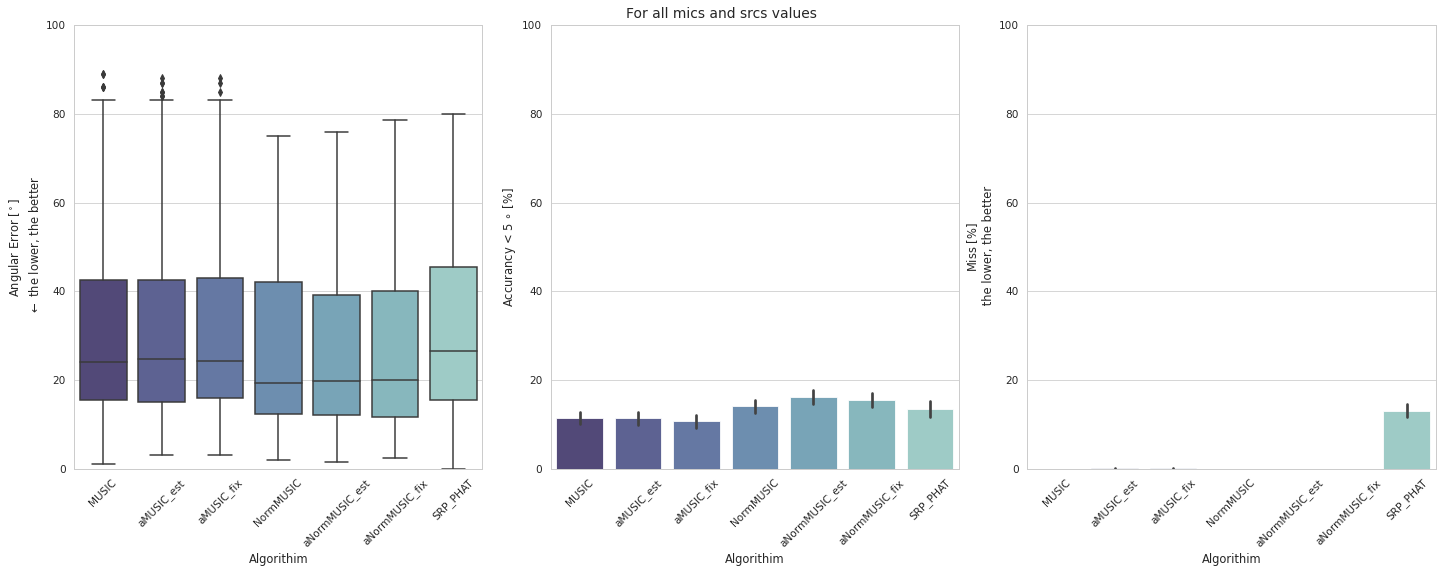

In [16]:
plt.figure(figsize=(20,8))
plt.suptitle('For all mics and srcs values')

plt.subplot(131)
sns.boxplot(x='algo', y='MAE', data=df[['algo','MAE']],
           hue_order=algo_order, palette=pal)
plt.ylim([0,100])
plt.xticks(rotation=45)
plt.ylabel('Angular Error [$^\circ$] \n $\leftarrow$ the lower, the better')
plt.xlabel('Algorithim')

plt.subplot(132)
sns.barplot(x='algo', y='ACC5', data=df[['algo','ACC5']],
           hue_order=algo_order, palette=pal)
plt.ylim([0,100])
plt.xticks(rotation=45)
plt.ylabel('Accurancy < 5 $\circ$ [$\%$]')
plt.xlabel('Algorithim')

plt.subplot(133)
sns.barplot(x='algo', y='MISS', data=df[['algo','MISS']],
           hue_order=algo_order, palette=pal)
plt.ylim([0,100])
plt.xticks(rotation=45)
plt.ylabel('Miss [$\%$] \n the lower, the better')
plt.xlabel('Algorithim')

# sns.despine(offset=10, trim=False, left=True, bottom=True)
plt.tight_layout(pad=0.5)
plt.show()

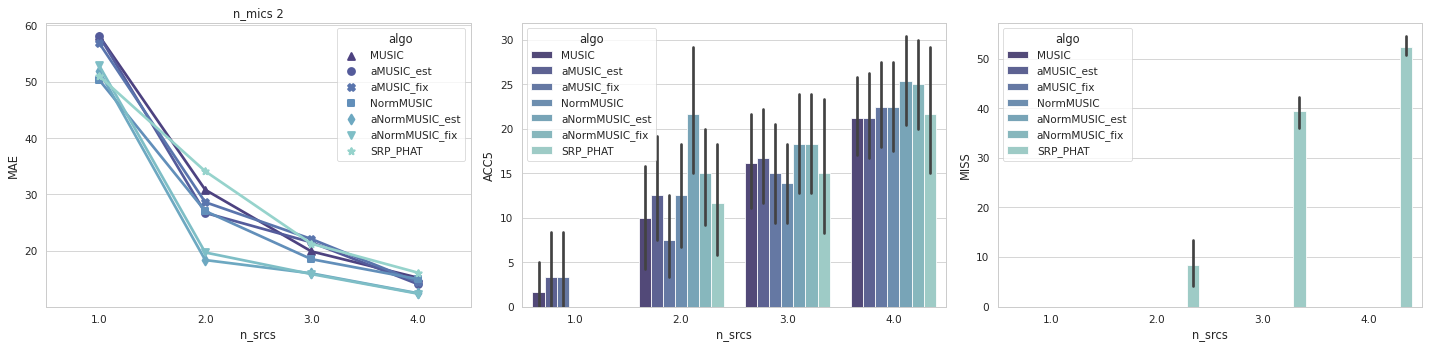

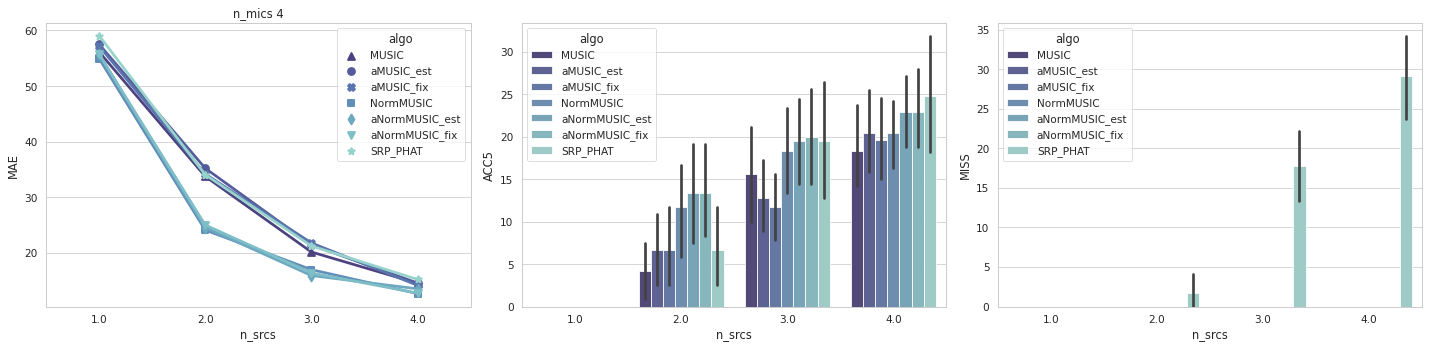

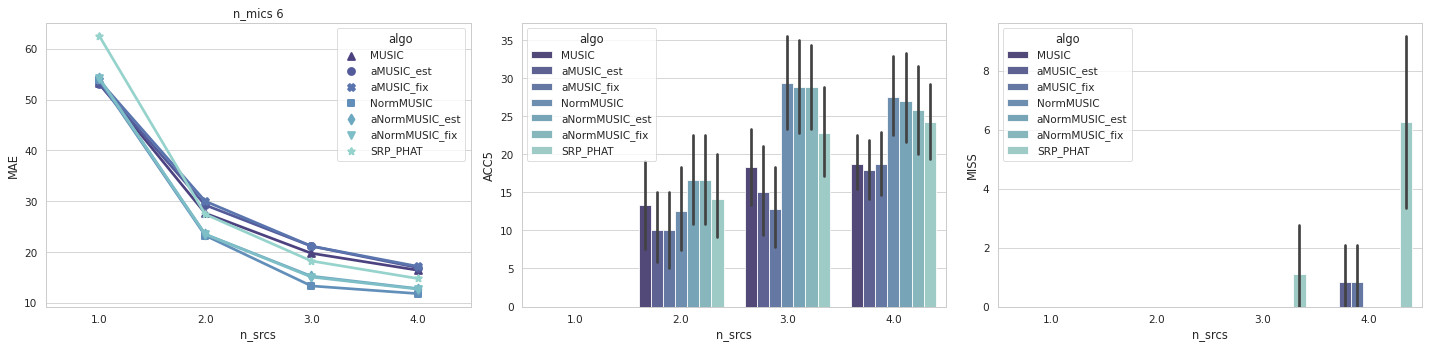

In [19]:
for n_mics in [2,4,6]:
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.title(f'n_mics {n_mics}')
    sns.pointplot(x='n_srcs', y='MAE', hue='algo', 
                  palette=pal,
                  data=df.loc[df['n_mics'] == n_mics],
                  markers=['^','o','X','s','d','v','*'],
                  ci=None
    )
    plt.subplot(132)
    sns.barplot(x='n_srcs', y='ACC5', hue='algo', 
                palette=pal,
                data=df.loc[df['n_mics'] == n_mics],
    )
    plt.subplot(133)
    sns.barplot(x='n_srcs', y='MISS', hue='algo', 
                palette=pal,
                data=df.loc[df['n_mics'] == n_mics],
    )
    
    plt.tight_layout()